<a href="https://colab.research.google.com/github/laxmivaishnavee22/OasisInfobyte/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
import zipfile, os, pandas as pd

with zipfile.ZipFile("archive (2).zip", "r") as zip_ref:
    zip_ref.extractall("data")

os.listdir("data")


['Twitter_Data.csv']

In [ ]:
df = pd.read_csv("data/Twitter_Data.csv")

df.head(), df.info(), df['clean_text'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


(                                          clean_text  category
 0  when modi promised “minimum government maximum...      -1.0
 1  talk all the nonsense and continue all the dra...       0.0
 2  what did just say vote for modi  welcome bjp t...       1.0
 3  asking his supporters prefix chowkidar their n...       1.0
 4  answer who among these the most powerful world...       1.0,
 None,
 0    when modi promised “minimum government maximum...
 1    talk all the nonsense and continue all the dra...
 2    what did just say vote for modi  welcome bjp t...
 3    asking his supporters prefix chowkidar their n...
 4    answer who among these the most powerful world...
 Name: clean_text, dtype: object)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_text'] = df['clean_text'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


from matplotlib import pyplot as plt
_df_0['category'].plot(kind='hist', bins=20, title='category')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['category']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'category'}, axis=1)
              .sort_values('category', ascending=True))
  xs = counted['category']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('category', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_text')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('category')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['category'].plot(kind='line', figsize=(8, 4), title='category')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['clean_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='category', y='clean_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df.dropna(subset=['category'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['category'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.88      0.76      0.81      7230
         0.0       0.85      0.97      0.90     10961
         1.0       0.92      0.87      0.90     14404

    accuracy                           0.88     32595
   macro avg       0.88      0.87      0.87     32595
weighted avg       0.88      0.88      0.88     32595



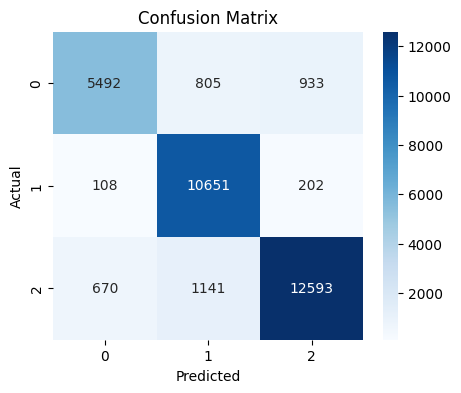

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
sample_text = ["I love this product!", "This is terrible and I hate it."]
sample_vec = vectorizer.transform(sample_text)
preds = model.predict(sample_vec)
for text, sentiment in zip(sample_text, preds):
    print(f"Text: {text} --> Sentiment: {sentiment}")


Text: I love this product! --> Sentiment: 1.0
Text: This is terrible and I hate it. --> Sentiment: -1.0
